## Module 4 - In this jupyter notebook, land and water productivity are calculated 
* Step 4a - Set up
* Step 4b - Calculate land productivity: i) biomass and ii) crop yield  
* Step 4c - Calculate productivity: i) biomass water productivity and ii) crop water productivity
**============================================================================================================**

![title](https://github.com/wateraccounting/WAPORWP/blob/master/Notebooks/img/Fig4_1.png?raw=true)

**============================================================================================================**

## Step 4a - Setu up

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## i) Import packages/libraries

In [2]:
import os
import sys
import glob

import numpy as np
from matplotlib import pyplot as plt

# change the directory to where the modules are saved
sys.path.insert(0,'/content/drive/My Drive/WAPORWP/Modules')
from GIS_functions import GIS_function as gis

## Step 4b - Calculate land productivity
* i) Biomass
* ii) Crop yield

## i) Calculate biomass
$Biomass   = AOT*f_c*\frac{NPP*22.222}{1-mc}$
<br/>where AOT is the above ground over total biomass production ration (-), fc is the light use efficiency correction factor[-]. NPP is seasonal net primary production in gC/m²/season, mc is moisture content in the fresh biomass [-] and HI is harvest index

## * Import seasonal NPP raster data

In [3]:
dir_proj = '/content/drive/My Drive/WAPORWP'
dir_data = "Data"

# seasonal net primary productin
input_folderNPP   = os.path.join(dir_proj, dir_data, "2L2_NPP_season") 
input_fhsNPP      = sorted(glob.glob(input_folderNPP  + '/*.tif'))

input_fhsNPP

['/content/drive/My Drive/WAPORWP/Data/2L2_NPP_season/NPP_2015-10-01_to_2016-09-30.tif',
 '/content/drive/My Drive/WAPORWP/Data/2L2_NPP_season/NPP_2016-10-01_to_2017-09-30.tif',
 '/content/drive/My Drive/WAPORWP/Data/2L2_NPP_season/NPP_2017-10-01_to_2018-09-30.tif',
 '/content/drive/My Drive/WAPORWP/Data/2L2_NPP_season/NPP_2018-10-01_to_2019-09-30.tif',
 '/content/drive/My Drive/WAPORWP/Data/2L2_NPP_season/NPP_2019-10-01_to_2020-09-30.tif']

## ** Crop parameters
![title](https://github.com/wateraccounting/WAPORWP/blob/master/Notebooks/img/Fig4_2.png?raw=true)

In [4]:
# Update the crop parameters specic to the crop
MC = 0.7  # moisture content, dry matter over freshbiomass
fc = 1.6  # Light use efficiency correction factor
AOT= 1    # above ground over total biomass production ratio(AOT)

## *** Output folder for the biomass layer: Make one or connect to the existing one

In [5]:
output_folderBM       = os.path.join(dir_proj, dir_data, "4L2_Biomass") 

# if the directory and folder does not exit, make one
if not os.path.exists(output_folderBM):
    os.makedirs(output_folderBM) 
output_folderBM

'/content/drive/My Drive/WAPORWP/Data/4L2_Biomass'

## **** Calculate above ground biomass (AGBM)

the mean & SD for   2015-10-01 to 2016-09-30 = 106.4 & 14.2


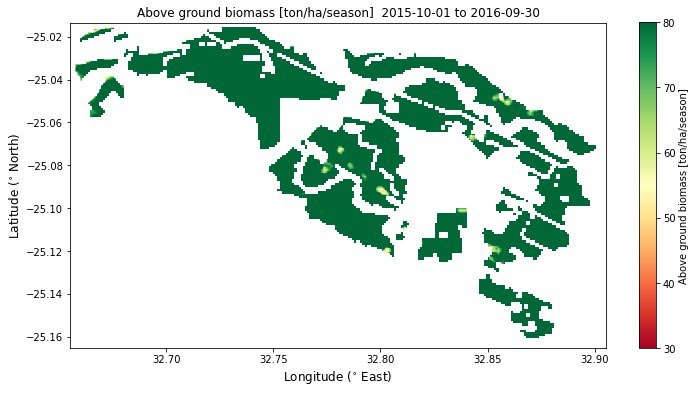

the mean & SD for   2016-10-01 to 2017-09-30 = 123.9 & 11.7


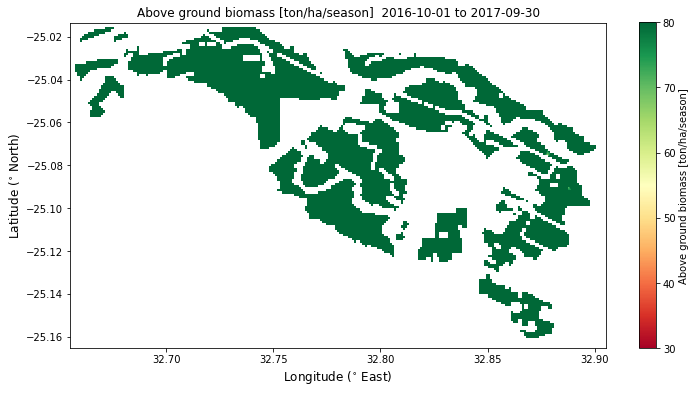

the mean & SD for   2017-10-01 to 2018-09-30 = 125.1 & 13.2


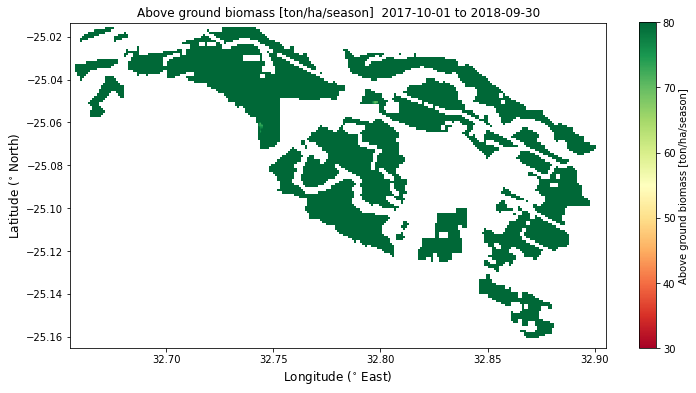

the mean & SD for   2018-10-01 to 2019-09-30 = 111.7 & 13.0


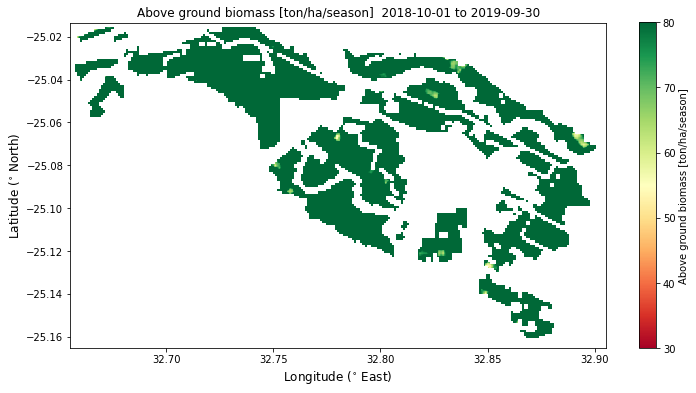

the mean & SD for   2019-10-01 to 2020-09-30 = 116.4 & 12.9


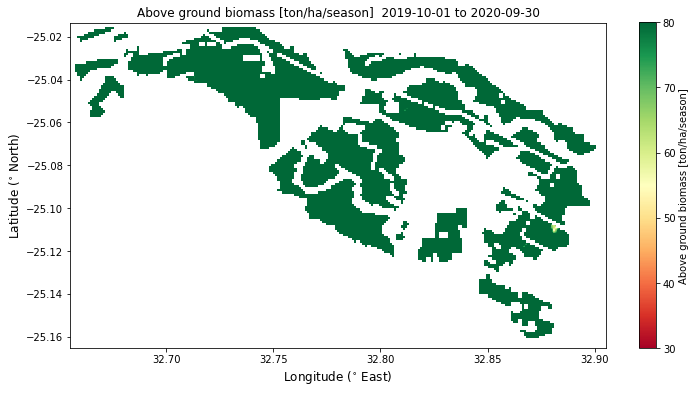

In [6]:
# collecting Geoinfo such as projection, the x and y axis
in_fh = input_fhsNPP[0]      
driver, NDV, xsize, ysize, GeoT, Projection = gis.GetGeoInfo(in_fh)
spatial_extent = (GeoT[0], GeoT[0] + GeoT[1] * xsize, GeoT[3] + GeoT[5] * ysize, GeoT[3])  # get spatial extent of raster


for in_fhNPP in input_fhsNPP:
    NPP  = gis.OpenAsArray(in_fhNPP, nan_values=True)  
    AGBM = (AOT * fc * (NPP * 22.222 / (1 - MC))) / 1000  # Above ground biomass, 1000 is to covert from kg to ton  
    
    
    # Identify the date from the file name
    date  = os.path.basename(in_fhNPP).split('.')[0].replace('NPP', '').replace('_', ' ')
                             
    # save into output folder
    output_folder = output_folderBM                 
    basename      = os.path.basename(in_fhNPP).replace('NPP', 'AGBM')                   
    output_fn     = os.path.join(output_folder,basename)                   
    gis.CreateGeoTiff(output_fn, AGBM, driver, NDV, xsize, ysize, GeoT, Projection) 
                             
    
    # Plot the raster map
    seasonal = AGBM
    
    # calculate the mean, SD
    print ('the mean & SD for ',date, '=', np.nanmean(seasonal).round(1),'&',np.nanstd(seasonal).round(1))

    
    plt.figure(figsize = (12,8))
    plt.imshow(seasonal, cmap='RdYlGn', vmin=np.nanmin(seasonal), vmax=np.nanmax(seasonal), extent=spatial_extent)
    plt.colorbar(shrink=0.75, label='Above ground biomass [ton/ha/season]')
    plt.xlabel('Longitude ($^{\circ}$ East)', fontsize=12)  # add axes label
    plt.ylabel('Latitude ($^{\circ}$ North)', fontsize=12)
    plt.title('Above ground biomass [ton/ha/season] ' + date)
    plt.clim(30,80)
    plt.show ()                          

## ii) Calculate crop yield
* $Crop yield = HI*B$
* where HI is harvest index, and B (or AGBM) is above ground biomass

## * Import the input raster data

In [7]:
input_folder   = os.path.join(dir_proj, dir_data, "4L2_Biomass") 
input_fhsAGBM  = sorted(glob.glob(input_folder  + '/*.tif'))

input_fhsAGBM

['/content/drive/My Drive/WAPORWP/Data/4L2_Biomass/AGBM_2015-10-01_to_2016-09-30.tif',
 '/content/drive/My Drive/WAPORWP/Data/4L2_Biomass/AGBM_2016-10-01_to_2017-09-30.tif',
 '/content/drive/My Drive/WAPORWP/Data/4L2_Biomass/AGBM_2017-10-01_to_2018-09-30.tif',
 '/content/drive/My Drive/WAPORWP/Data/4L2_Biomass/AGBM_2018-10-01_to_2019-09-30.tif',
 '/content/drive/My Drive/WAPORWP/Data/4L2_Biomass/AGBM_2019-10-01_to_2020-09-30.tif']

## ** Update the Harvest index

In [8]:
HI = 1     # harvest index of the crop

## *** Output folder for the crop yield layer: Make one or connect to the existing one

In [9]:
output_folderY = os.path.join(dir_proj, dir_data, "4L2_Yield") 

# if the directory and folder does not exit, make one
if not os.path.exists(output_folderY):
    os.makedirs(output_folderY) 
output_folderY

'/content/drive/My Drive/WAPORWP/Data/4L2_Yield'

## **** Calculate crop yield

the mean & SD for   2015-10-01 to 2016-09-30 = 106.4 & 14.2


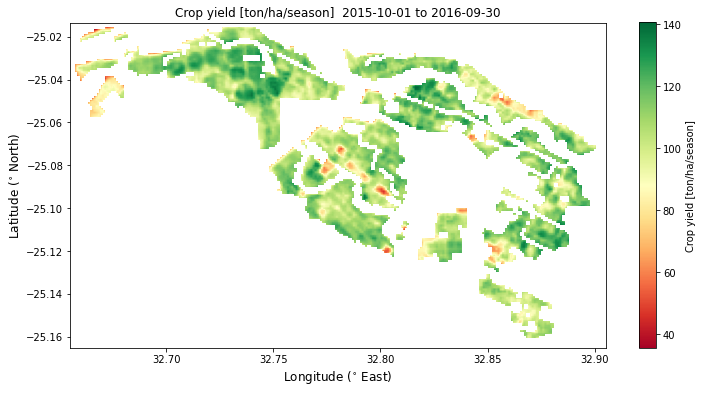

the mean & SD for   2016-10-01 to 2017-09-30 = 123.9 & 11.7


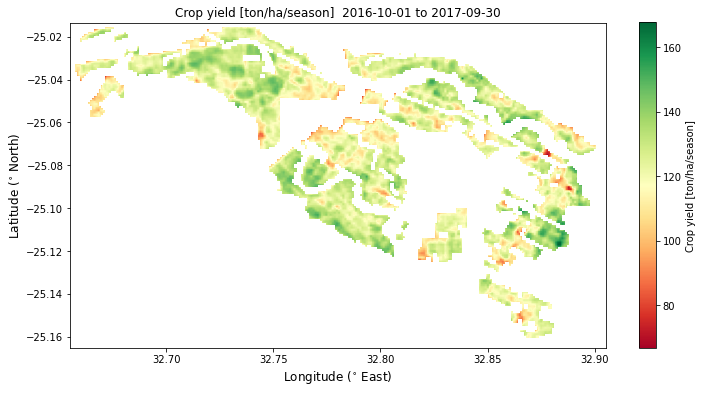

the mean & SD for   2017-10-01 to 2018-09-30 = 125.1 & 13.2


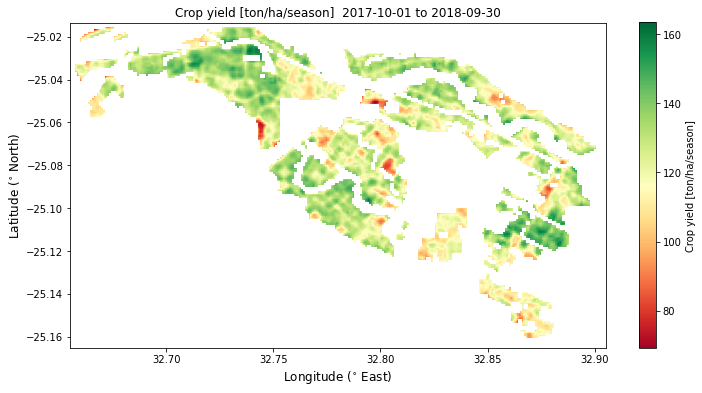

the mean & SD for   2018-10-01 to 2019-09-30 = 111.7 & 13.0


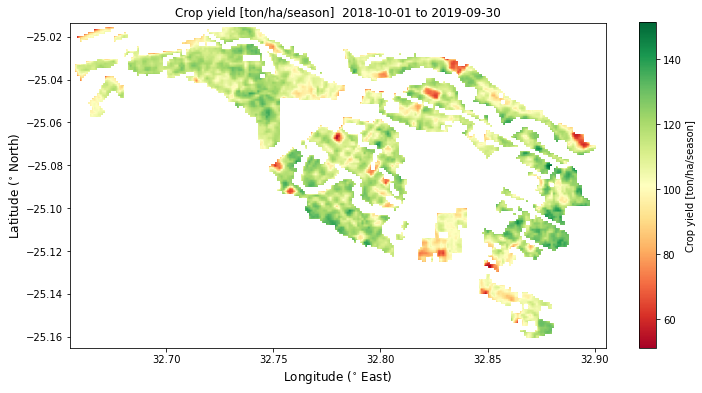

the mean & SD for   2019-10-01 to 2020-09-30 = 116.4 & 12.9


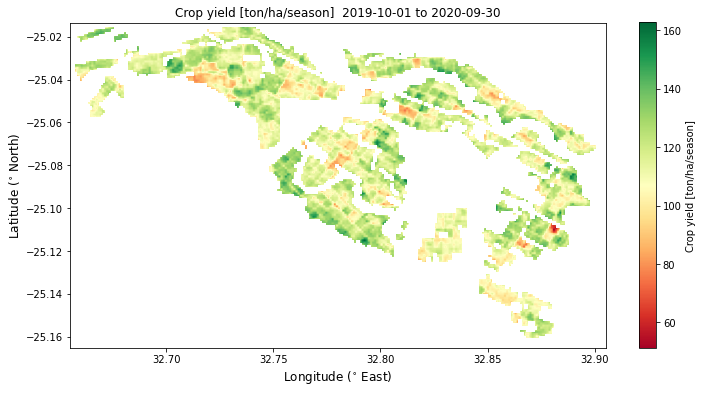

In [10]:
# collecting Geoinfo such as projection, the x and y axis
in_fh = input_fhsAGBM[0]      
driver, NDV, xsize, ysize, GeoT, Projection = gis.GetGeoInfo(in_fh)
spatial_extent = (GeoT[0], GeoT[0] + GeoT[1] * xsize, GeoT[3] + GeoT[5] * ysize, GeoT[3])  # get spatial extent of raster

for in_fhAGBM in input_fhsAGBM:
    AGBM      = gis.OpenAsArray(in_fhAGBM, nan_values=True)  
    CropYield = HI*AGBM  
        
    # Identify the date from the file name
    date  = os.path.basename(in_fhAGBM).split('.')[0].replace('AGBM', '').replace('_', ' ')
                             
    # save into output folder
    output_folder = output_folderY                 
    basename      = os.path.basename(in_fhAGBM).replace('AGBM', 'Yield')                   
    output_fn     = os.path.join(output_folder,basename)                   
    gis.CreateGeoTiff(output_fn, CropYield, driver, NDV, xsize, ysize, GeoT, Projection) 
                             
    # Plot the raster map
    seasonal = CropYield
       
    # calculate the mean, SD
    print ('the mean & SD for ',date, '=', np.nanmean(seasonal).round(1),'&',np.nanstd(seasonal).round(1))
    
    plt.figure(figsize = (12,8))
    plt.imshow(seasonal, cmap='RdYlGn', vmin=np.nanmin(seasonal), vmax=np.nanmax(seasonal), extent=spatial_extent)
    plt.colorbar(shrink=0.75, label='Crop yield [ton/ha/season]')
    plt.xlabel('Longitude ($^{\circ}$ East)', fontsize=12)  # add axes label
    plt.ylabel('Latitude ($^{\circ}$ North)', fontsize=12)
    plt.title('Crop yield [ton/ha/season] ' + date)
    plt.clim()
    plt.show ()                            

## Step 4c - Calculate water productivity (WP)

## i) Calculate biomass water productivity 
$Biomass WP= \frac{Biomass}{ET_a}$

## * Import the input raster data

In [11]:
input_folder1  = os.path.join(dir_proj, dir_data, "2L2_AETI_season") 
input_fhsET    = sorted(glob.glob(input_folder1 + '/*.tif'))

input_folder2  = os.path.join(dir_proj, dir_data, "4L2_Biomass") 
input_fhsAGBM  = sorted(glob.glob(input_folder2 + '/*.tif'))

input_fhsET[0], input_fhsAGBM[0]

('/content/drive/My Drive/WAPORWP/Data/2L2_AETI_season/ETa_2015-10-01_to_2016-09-30.tif',
 '/content/drive/My Drive/WAPORWP/Data/4L2_Biomass/AGBM_2015-10-01_to_2016-09-30.tif')

## ** Output folder for the WPb layer: Make one or connect to the existing one

In [12]:
output_folderWPb = os.path.join(dir_proj, dir_data, "4L2_WPb") 

# if the directory and folder does not exit, make one
if not os.path.exists(output_folderWPb):
    os.makedirs(output_folderWPb) 
output_folderWPb

'/content/drive/My Drive/WAPORWP/Data/4L2_WPb'

## **** Calculate biomass water productivity (WPb)

the mean & SD for   2015-10-01 to 2016-09-30 = 8.3 & 0.6


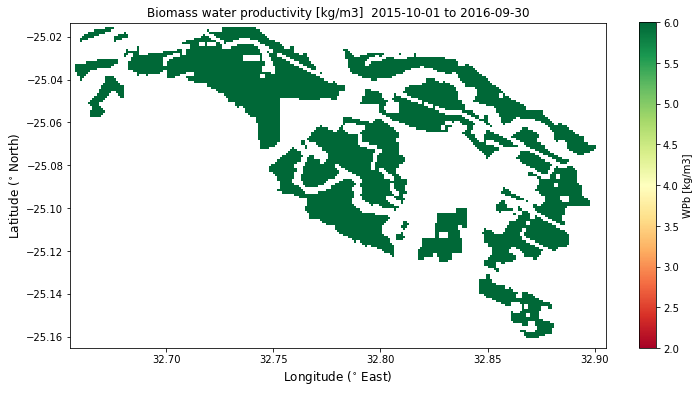

the mean & SD for   2016-10-01 to 2017-09-30 = 9.2 & 0.4


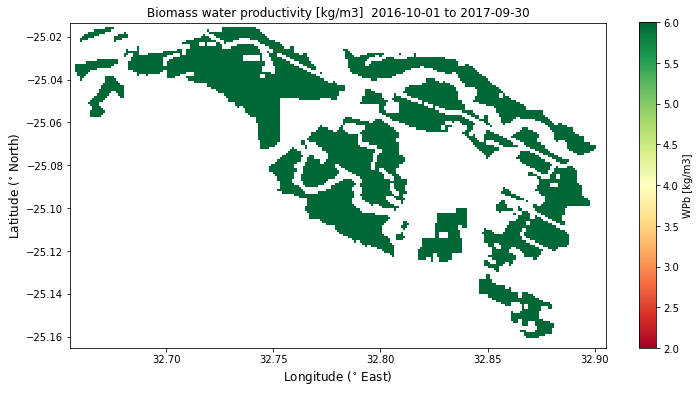

the mean & SD for   2017-10-01 to 2018-09-30 = 9.2 & 0.4


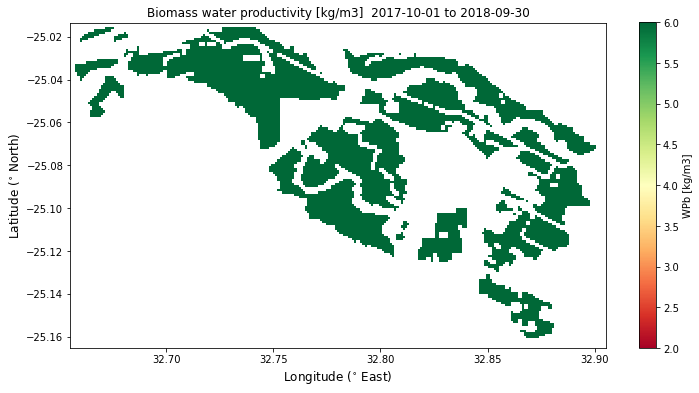

the mean & SD for   2018-10-01 to 2019-09-30 = 8.3 & 0.4


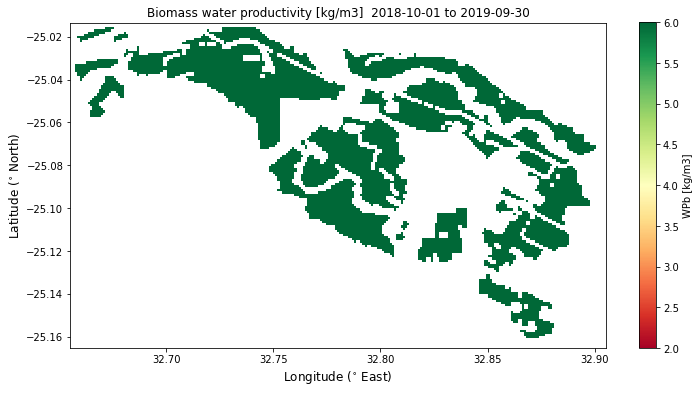

the mean & SD for   2019-10-01 to 2020-09-30 = 8.9 & 0.5


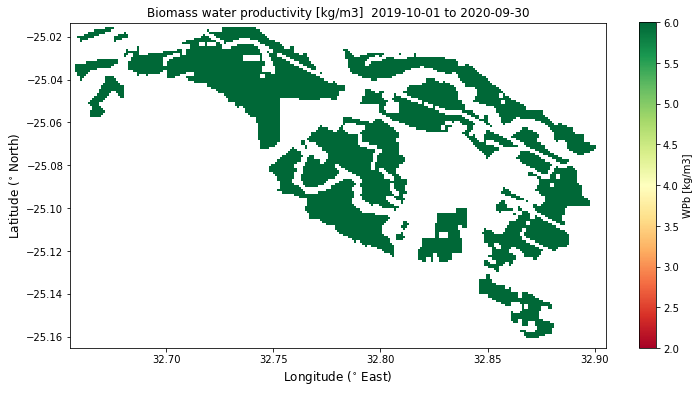

In [13]:
# collecting Geoinfo such as projection, the x and y axis
in_fh = input_fhsET[0]
driver, NDV, xsize, ysize, GeoT, Projection = gis.GetGeoInfo(in_fh)
spatial_extent = (GeoT[0], GeoT[0] + GeoT[1] * xsize, GeoT[3] + GeoT[5] * ysize, GeoT[3])  # get spatial extent of raster

## Calculate the WP
for in_fhET, in_fhAGBM in zip(input_fhsET, input_fhsAGBM):
    AETI = gis.OpenAsArray(in_fhET, nan_values=True) 
    AGBM = gis.OpenAsArray(in_fhAGBM, nan_values=True)
    WPb  = AGBM/AETI*100
    
    # Identify the date from the file name
    date  = os.path.basename(in_fhET).split('.')[0].replace('ETa', '').replace('_', ' ')
    
    # save into output folder
    output_folder = output_folderWPb
    basename      = os.path.basename(in_fhET).replace('ETa', 'WPb')
    output_fn     = os.path.join(output_folder, basename)
    gis.CreateGeoTiff(output_fn, WPb, driver, NDV, xsize, ysize, GeoT, Projection) 
        
    # Plot the raster map
    seasonal = WPb
    
    # calculate the mean, SD
    print ('the mean & SD for ',date, '=', np.nanmean(seasonal).round(1),'&',np.nanstd(seasonal).round(1))
    
    plt.figure(figsize = (12,8))
    plt.imshow(seasonal, cmap='RdYlGn', vmin=np.nanmin(seasonal), vmax=np.nanmax(seasonal), extent=spatial_extent)
    plt.colorbar(shrink=0.75, label='WPb [kg/m3]')
    plt.xlabel('Longitude ($^{\circ}$ East)', fontsize=12)  # add axes label
    plt.ylabel('Latitude ($^{\circ}$ North)', fontsize=12)
    plt.title('Biomass water productivity [kg/m3] ' + date)
    plt.clim(2,6)
    plt.show ()  
    ;

## ii) Calculate crop water productivity 
$Crop WP = \frac{CropYield}{ET_a}$

## * Import the input raster data

In [14]:
dir_proj = '/content/drive/My Drive/WAPORWP'
dir_data = "Data"

input_folder1  = os.path.join(dir_proj, dir_data, "2L2_AETI_season") 
input_fhsET    = sorted(glob.glob(input_folder1 + '/*.tif'))
input_folder2  = os.path.join(dir_proj, dir_data, "4L2_Yield") 
input_fhsY     = sorted(glob.glob(input_folder2 + '/*.tif'))
input_fhsET[0], input_fhsY[0]

('/content/drive/My Drive/WAPORWP/Data/2L2_AETI_season/ETa_2015-10-01_to_2016-09-30.tif',
 '/content/drive/My Drive/WAPORWP/Data/4L2_Yield/Yield_2015-10-01_to_2016-09-30.tif')

## ** Output folder for the WPb layer: Make one or connect to the existing one

In [15]:
dir_proj = '/content/drive/My Drive/WAPORWP'   
dir_data = "Data"

output_folderWPy = os.path.join(dir_proj, dir_data, "4L2_WPy") 

# if the directory and folder does not exit, make one
if not os.path.exists(output_folderWPy):
    os.makedirs(output_folderWPy) 
output_folderWPy

'/content/drive/My Drive/WAPORWP/Data/4L2_WPy'

## **** Calculate crop water productivity (WPy)

the mean & SD for   2015-10-01 to 2016-09-30 = 8.3 & 0.6


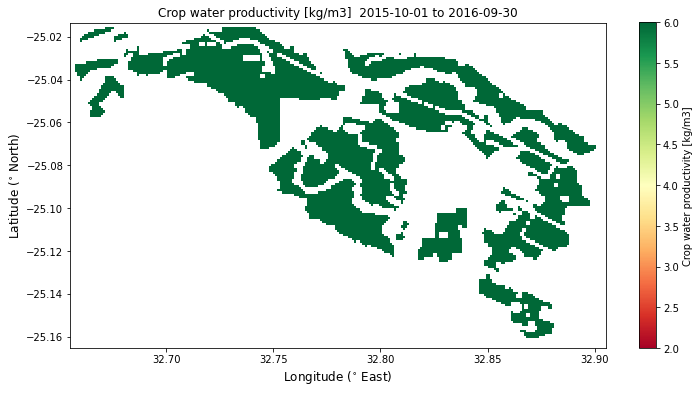

the mean & SD for   2016-10-01 to 2017-09-30 = 9.2 & 0.4


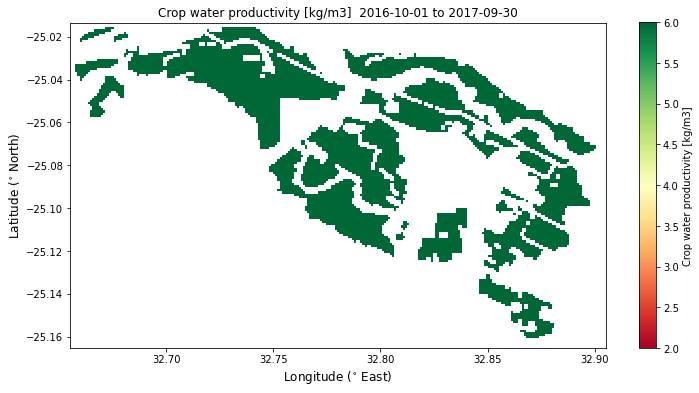

the mean & SD for   2017-10-01 to 2018-09-30 = 9.2 & 0.4


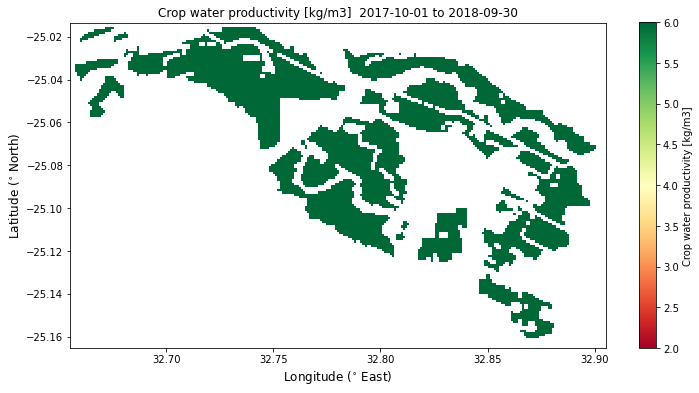

the mean & SD for   2018-10-01 to 2019-09-30 = 8.3 & 0.4


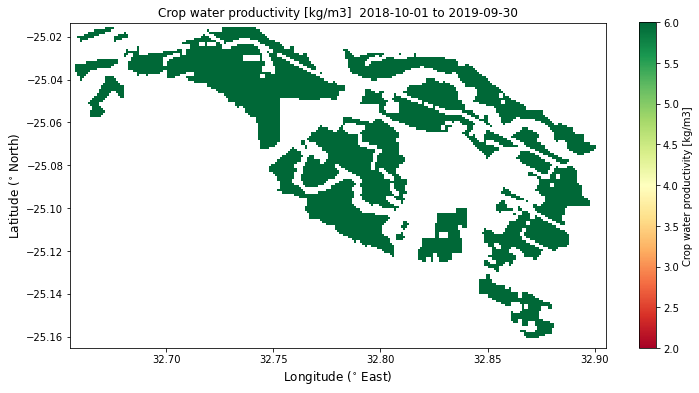

the mean & SD for   2019-10-01 to 2020-09-30 = 8.9 & 0.5


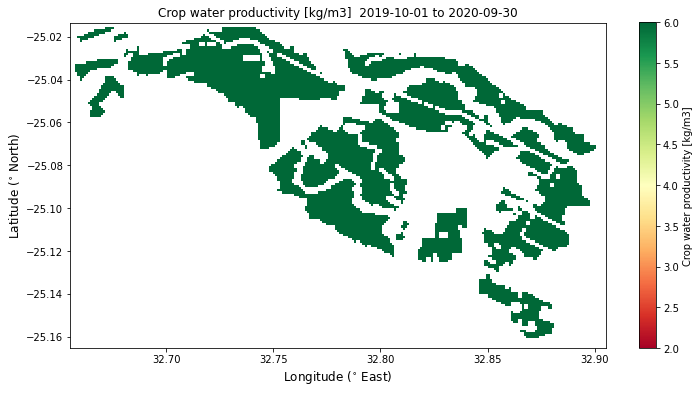

In [16]:
# collecting Geoinfo such as projection, the x and y axis
in_fh = input_fhsET[0]
driver, NDV, xsize, ysize, GeoT, Projection = gis.GetGeoInfo(in_fh)
spatial_extent = (GeoT[0], GeoT[0] + GeoT[1] * xsize, GeoT[3] + GeoT[5] * ysize, GeoT[3])  # get spatial extent of raster

## Calculate the WP
for in_fhET, in_fhY in zip(input_fhsET, input_fhsY):
    AETI  = gis.OpenAsArray(in_fhET, nan_values=True) 
    Yield = gis.OpenAsArray(in_fhY, nan_values=True)
    WPy   = Yield/AETI*100

    # Identify the date from the file name
    date  = os.path.basename(in_fhET).split('.')[0].replace('ETa', '').replace('_', ' ')

    # save into output folder
    output_folder = output_folderWPy
    basename      = os.path.basename(in_fhET).replace('ETa', 'WPy')
    output_fn     = os.path.join(output_folder, basename)
    gis.CreateGeoTiff(output_fn, WPy, driver, NDV, xsize, ysize, GeoT, Projection) 

    # Plot the raster map
    seasonal = WPy
    
    # calculate the mean, SD
    print ('the mean & SD for ',date, '=', np.nanmean(seasonal).round(1),'&',np.nanstd(seasonal).round(1))

    plt.figure(figsize = (12,8))
    plt.imshow(seasonal, cmap='RdYlGn', vmin=np.nanmin(seasonal), vmax=np.nanmax(seasonal), extent=spatial_extent)
    plt.colorbar(shrink=0.75, label='Crop water productivity [kg/m3]')
    plt.xlabel('Longitude ($^{\circ}$ East)', fontsize=12)  # add axes label
    plt.ylabel('Latitude ($^{\circ}$ North)', fontsize=12)
    plt.title('Crop water productivity [kg/m3] ' + date)
    plt.clim(2,6)
    plt.show ()   